In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

from google.colab import drive

In [2]:
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/PTDLKD/Data/BTC-USD.csv")
df = df.sort_values("Date")
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3148 entries, 0 to 3147
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3148 non-null   object 
 1   Open       3148 non-null   float64
 2   High       3148 non-null   float64
 3   Low        3148 non-null   float64
 4   Close      3148 non-null   float64
 5   Adj Close  3148 non-null   float64
 6   Volume     3148 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 196.8+ KB


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


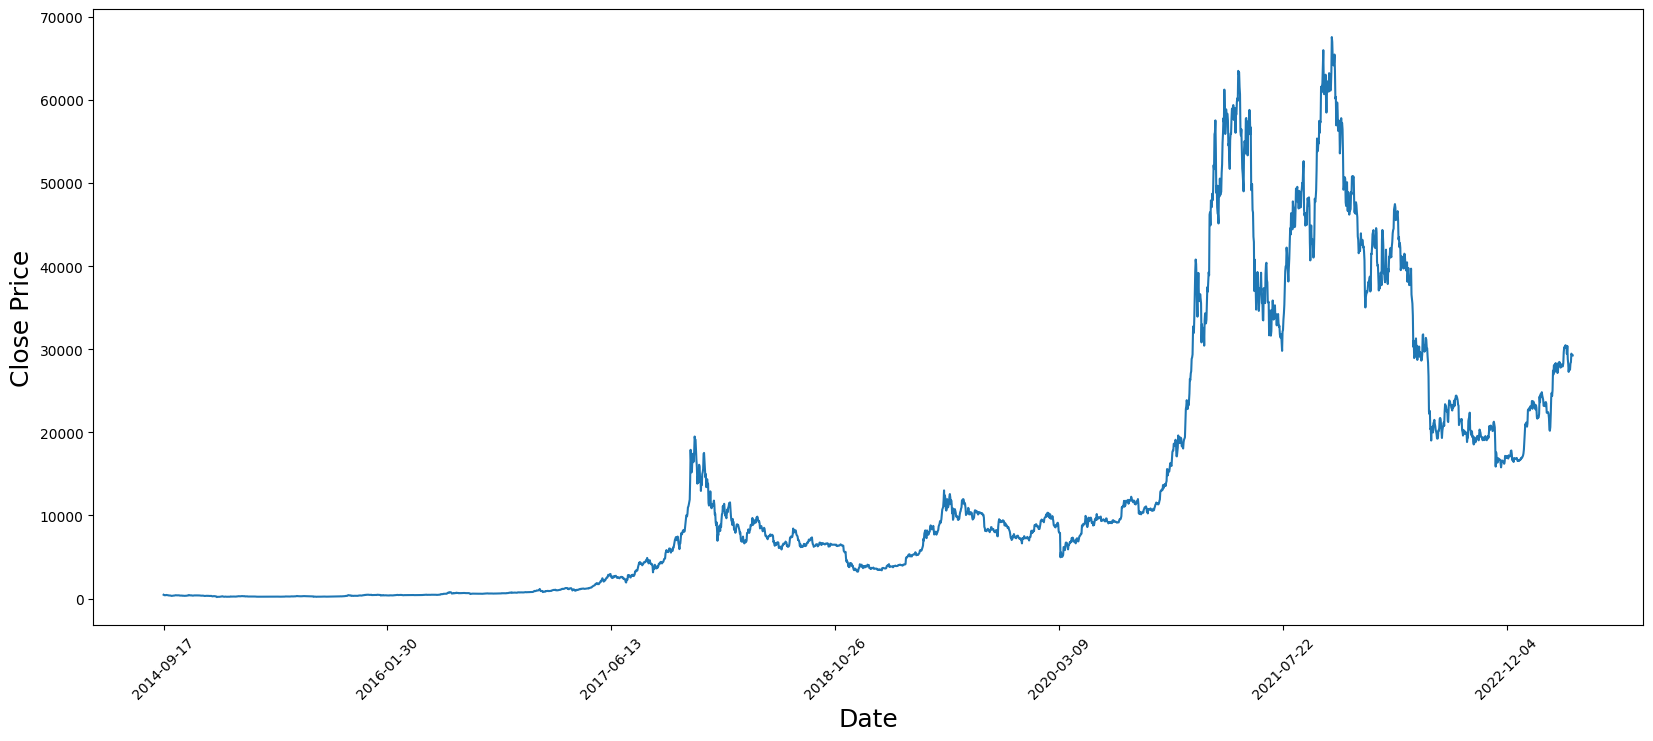

In [ ]:
# Data visualization
plt.figure(figsize = (20,8))
plt.plot(range(df.shape[0]),(df['Close']))
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

In [5]:
close_prices = df['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

array([[[0.00414359],
        [0.00365546],
        [0.00321557],
        ...,
        [0.00360048],
        [0.00326041],
        [0.00293862]],

       [[0.00365546],
        [0.00321557],
        [0.00342492],
        ...,
        [0.00326041],
        [0.00293862],
        [0.00311297]],

       [[0.00321557],
        [0.00342492],
        [0.0032753 ],
        ...,
        [0.00293862],
        [0.00311297],
        [0.00310593]],

       ...,

       [[0.49406677],
        [0.5515317 ],
        [0.54199712],
        ...,
        [0.58718132],
        [0.60383175],
        [0.63272301]],

       [[0.5515317 ],
        [0.54199712],
        [0.55137258],
        ...,
        [0.60383175],
        [0.63272301],
        [0.65853298]],

       [[0.54199712],
        [0.55137258],
        [0.52493073],
        ...,
        [0.63272301],
        [0.65853298],
        [0.6472895 ]]])

In [ ]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

Build LSTM model with 50 neurons and 4 hidden layers. Using MSE loss function and Adam stochastic gradient descent optimizer.

In [ ]:
model = keras.Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 60, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 25)                2525      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-tr

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 10, epochs=100)

Epoch 1/100
246/246 [==============================] - 26s 86ms/step - loss: 4.6817e-04
Epoch 2/100
246/246 [==============================] - 20s 80ms/step - loss: 5.0518e-04
Epoch 3/100
246/246 [==============================] - 21s 85ms/step - loss: 5.7136e-04
Epoch 4/100
246/246 [==============================] - 19s 79ms/step - loss: 5.4477e-04
Epoch 5/100
246/246 [==============================] - 23s 95ms/step - loss: 5.0775e-04
Epoch 6/100
246/246 [==============================] - 21s 86ms/step - loss: 4.8621e-04
Epoch 7/100
246/246 [==============================] - 21s 87ms/step - loss: 5.2681e-04
Epoch 8/100
246/246 [==============================] - 20s 80ms/step - loss: 4.9933e-04
Epoch 9/100
246/246 [==============================] - 21s 84ms/step - loss: 4.7847e-04
Epoch 10/100
246/246 [==============================] - 20s 81ms/step - loss: 4.0648e-04
Epoch 11/100
246/246 [==============================] - 20s 80ms/step - loss: 4.9228e-04
Epoch 12/100
246/246 [========

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

20/20 [==============================] - 2s 34ms/step


11.11662228497411

<ipython-input-23-43e7a588867d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


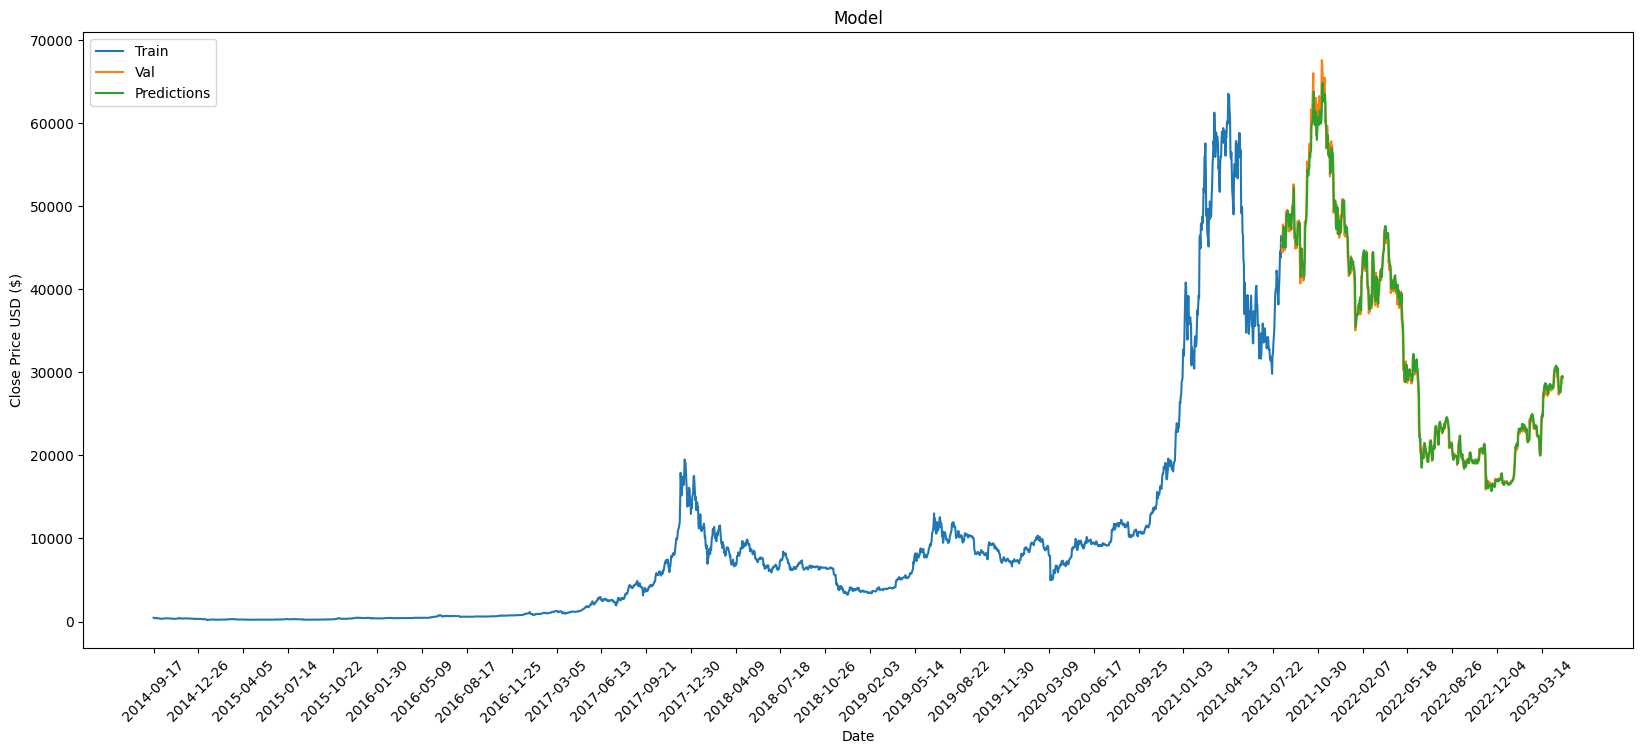

In [ ]:
data = df.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(20,8))
plt.title('Model')
plt.xticks(range(0,df.shape[0],100),df['Date'].loc[::100],rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()